# EDA

In [80]:
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import model_selection


In [81]:
# this is for the metadata
df = pd.read_csv('csv_files/9_1_all_books_df.csv')

# this is for the vectorized text
df_text = pd.read_csv('csv_files/X_train_nlp.csv')
# 'csv_files/X_train_nlp.csv', encoding='utf-8', index=False
# 'csv_files/y_train_nlp.csv', encoding='utf-8', index=False

In [82]:
df_text.head(2)

,aaron,ab,abandon,abandonment,abby,abc,abduct,abducted,ability,able,...,zelda,zest,zeus,zillion,zimmer,zoe,zone,zoom,zorie,zoroastrian
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
df.head(2)

,author,description,format,genre,month,pages,publisher,rating,title,year,best_seller
0,Liane Moriarty,Six responsible adults. Three cute kids. One s...,Hardcover,Fiction,July,415,Flatiron Books,3.56,Truly Madly Guilty,2016.0,0
1,Bryn Greenwood,"As the daughter of a meth dealer, Wavy knows n...",Hardcover,Fiction,August,346,Thomas Dunne Books,4.07,All the Ugly and Wonderful Things,2016.0,0


In [84]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df[['title', 'author', 'format', 'genre', 'pages', 'rating']], 
                                                                    df['best_seller'], 
                                                                    test_size = .2,
                                                                    random_state = 42)

In [85]:
# reset the index to match df_text
len(X_train)
type(X_train)
X_train.reset_index(drop = True)
y_train.reset_index(drop = True)

0       0
1       0
2       1
3       0
4       0
5       1
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      1
17      0
18      0
19      1
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1068    0
1069    0
1070    0
1071    0
1072    0
1073    1
1074    0
1075    1
1076    0
1077    0
1078    1
1079    0
1080    0
1081    0
1082    0
1083    1
1084    0
1085    0
1086    1
1087    0
1088    0
1089    1
1090    0
1091    0
1092    0
1093    1
1094    1
1095    1
1096    0
1097    1
Name: best_seller, Length: 1098, dtype: int64

# data
- y_train is bestseller ~bestseller
- X_train is book meta data
- df_text is just text data

In [86]:
print('number of best sellers in training set', y_train.sum())
print('number of total books in training set', len(y_train))

number of best sellers in training set 227
number of total books in training set 1098


In [87]:
df.columns

Index(['author', 'description', 'format', 'genre', 'month', 'pages',
       'publisher', 'rating', 'title', 'year', 'best_seller'],
      dtype='object')

In [88]:
X_train['bestseller'] = y_train

In [89]:
X_train.rename(columns={'genre':'book_genre'}, inplace = True)
# X_train['book_genre'] = 

In [90]:
df = X_train.reset_index(drop = True)

In [91]:
df = pd.concat([df, df_text], axis =1)

In [92]:
df.shape

(1098, 5849)

In [93]:
# check that every book is rated
df.rating.isnull().sum()

0

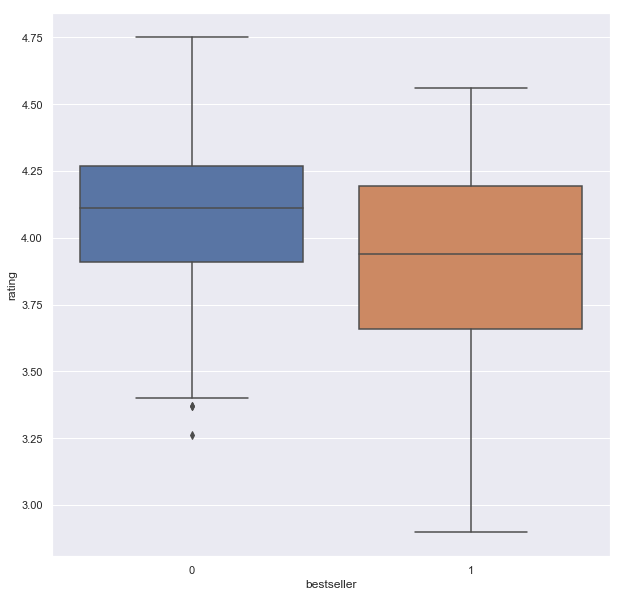

In [94]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x=df["bestseller"], y=df['rating'])#, 
#                     data=df, palette="Set3")


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e2aeb70>,
      dtype=object)

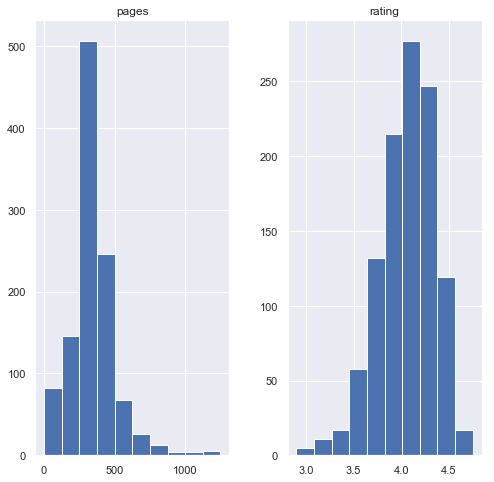

In [95]:
df.hist(column=['pages', 'rating'], figsize=(8,8))

In [110]:
# need to look at book_genre more
df['book_genre'].unique()
# df['book_genre'].isnull().sum()

array(['Autobiography', 'Sequential Art', 'Economics', 'Fantasy',
       'Historical', 'Fiction', 'Nonfiction', 'Horror', 'Young Adult',
       'Poetry', 'Science', 'Short Stories', 'New Adult', 'Classics',
       'Contemporary', 'Science Fiction', 'Childrens', 'Food and Drink',
       'Humor', 'Thriller', 'Polyamorous', 'History', 'Romance',
       'Mystery', 'Media Tie In', 'Literature', 'Biography', 'Politics',
       'Paranormal', 'Writing', 'Dark', 'Business', 'Religion',
       'Philosophy', 'Christian', 'Sports and Games'], dtype=object)

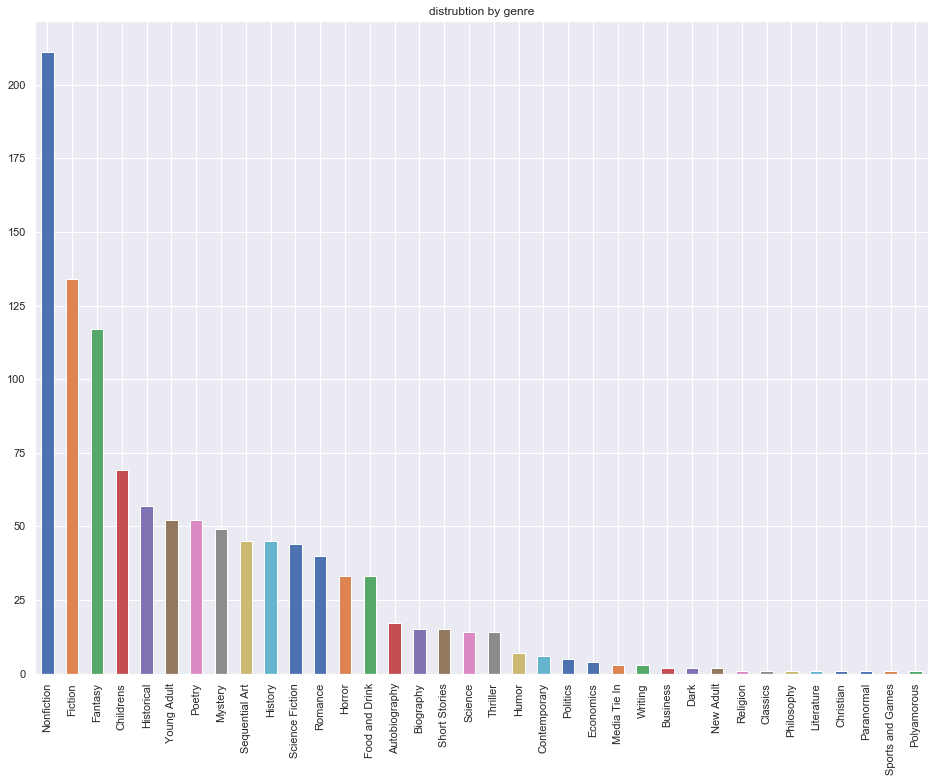

In [111]:
# this plot is for all books, bestsellers and not
# sns.set(rc={'figure.figsize':(16,12)})
# sns.countplot(x ='book_genre', data = df )
# plt.xticks(rotation=68)
# plt.title('Distribution of Genres')
# plt.show()
# df.plot.bar(x = df['book_genre'])

# looking at the distrubtion by genre
df['book_genre'].value_counts().plot(kind='bar', title='distrubtion by genre')

In [126]:
books = df.loc[df['bestseller'] == 0]
best_books = df.loc[df['bestseller'] == 1]

In [128]:
# this is just the distribution in the training data
print(books.shape)
print(best_books.shape)

(871, 5849)
(227, 5849)


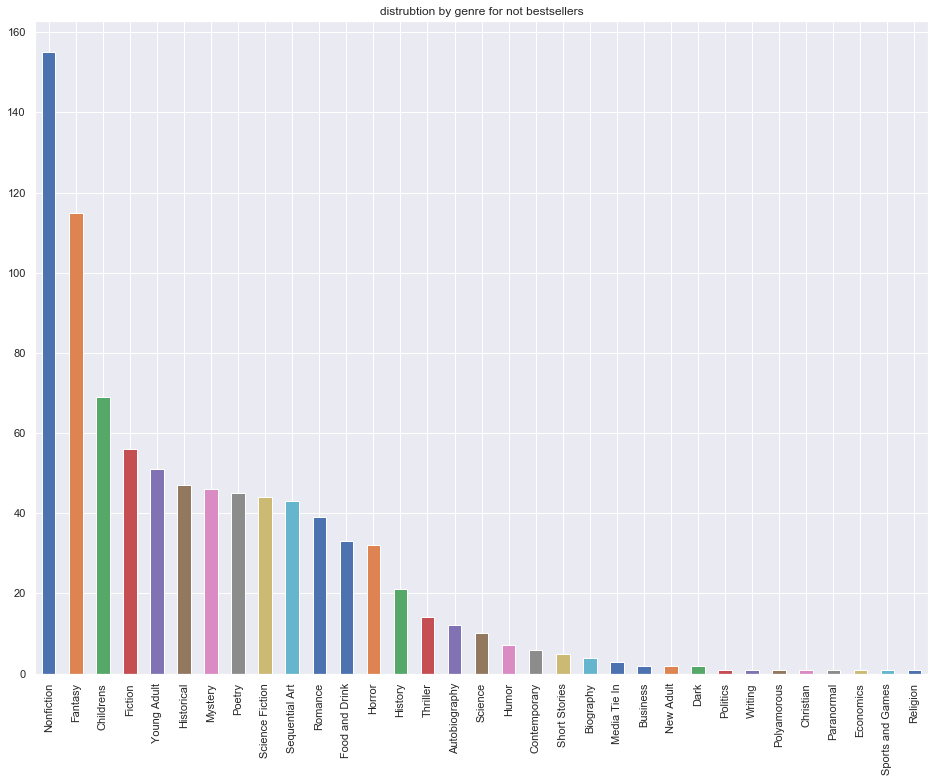

In [130]:
books['book_genre'].value_counts().plot(kind='bar', title='distrubtion by genre for not bestsellers')



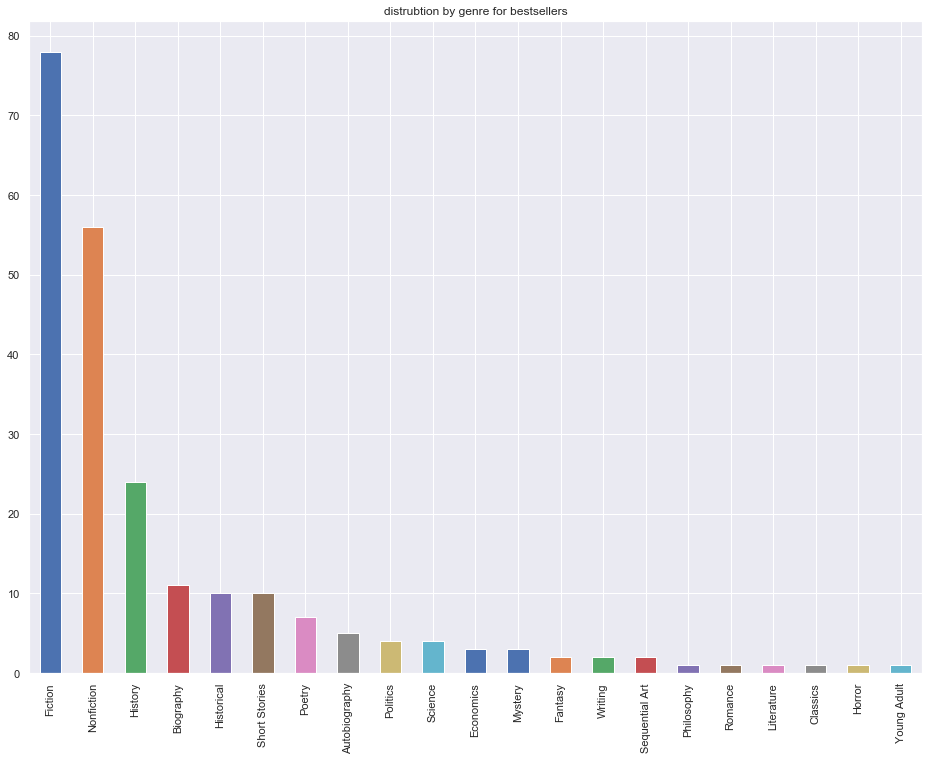

In [132]:
best_books['book_genre'].value_counts().plot(kind='bar', title='distrubtion by genre for bestsellers')


In [ ]:
# this plot is for books that are not bestsellers
sns.set(rc={'figure.figsize':(16,12)})
sns.countplot(off_the_list_df['genre'],label="Count", )
plt.xticks(rotation=68)
plt.title('Distribution of Genres for non Bestsellers')
plt.show()

In [ ]:
# this plot is for books that are not bestsellers
sns.set(rc={'figure.figsize':(16,12)})
sns.countplot(bs_df['genre'],label="Count", )
plt.xticks(rotation=68)
plt.title('Distribution of Genres for Bestsellers')
plt.show()